<a href="https://colab.research.google.com/github/lisamarieholz/MachineLearning/blob/main/Over_sampling%2C_Under_sampling_%26_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import the Credit Card Fraud Data From CCLE

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import warnings

import pandas as pd
from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)


In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/Data/fraudTest.csv")

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

In [ ]:
type(df_select["trans_date_trans_time"][0])

str

In [ ]:
df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])

In [ ]:
df_select["time_var"] = [1 if i.hour>=0 and i.hour<6 else 0 for i in df_select["trans_date_trans_time"]] #a time_var that captures whether or not it is between midnight and 6am i.e. night or not

In [ ]:
df_select.head()

,trans_date_trans_time,category,amt,city_pop,is_fraud,time_var
0,2020-06-21 12:14:25,personal_care,2.86,333497,0,0
1,2020-06-21 12:14:33,personal_care,29.84,302,0,0
2,2020-06-21 12:14:53,health_fitness,41.28,34496,0,0
3,2020-06-21 12:15:15,misc_pos,60.05,54767,0,0
4,2020-06-21 12:15:17,travel,3.19,1126,0,0


In [ ]:
orig_sample = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time"], axis = 1)
orig_sample.head()

,amt,city_pop,is_fraud,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,333497,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,29.84,302,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41.28,34496,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,60.05,54767,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3.19,1126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
X = orig_sample[['amt', 'city_pop', 'time_var', 'category_entertainment',
       'category_food_dining', 'category_gas_transport',
       'category_grocery_net', 'category_grocery_pos',
       'category_health_fitness', 'category_home', 'category_kids_pets',
       'category_misc_net', 'category_misc_pos', 'category_personal_care',
       'category_shopping_net', 'category_shopping_pos', 'category_travel']]
y = orig_sample["is_fraud"]

In [ ]:
orig_sample[orig_sample['is_fraud']==1].value_counts().sum()

2145

In [ ]:
orig_sample[orig_sample['is_fraud']==0].value_counts().sum()

553574

In [ ]:
2145/(2145+553574)

0.0038598644278853163

# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [ ]:
ros = RandomOverSampler(random_state=88)
ros.fit(X_train,y_train)
X_oresampled, y_oresampled = ros.fit_resample(X_train,y_train)

rus = RandomUnderSampler(random_state=88)
rus.fit(X_train,y_train)
X_uresampled, y_uresampled = rus.fit_resample(X_train,y_train)

oversample = SMOTE()
X_SMOTE,y_SMOTE = oversample.fit_resample(X_train,y_train)


# 3.) Train three logistic regression models 

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

Over:

In [ ]:
o_log_reg = LogisticRegression().fit(X_oresampled, y_oresampled)

Under:

In [ ]:
u_log_reg = LogisticRegression().fit(X_uresampled, y_uresampled)

SMOTE:

In [ ]:
S_log_reg = LogisticRegression().fit(X_SMOTE,y_SMOTE)

# 4.) Test the three models

Over:

In [ ]:
o_pred = o_log_reg.predict(X_test)

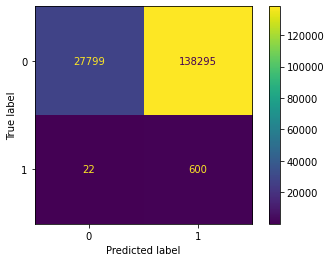

In [ ]:
plot_confusion_matrix(o_log_reg, X_test, y_test)
plt.show()

In [ ]:
print(classification_report(y_test,o_pred))

              precision    recall  f1-score   support

           0       1.00      0.17      0.29    166094
           1       0.00      0.96      0.01       622

    accuracy                           0.17    166716
   macro avg       0.50      0.57      0.15    166716
weighted avg       1.00      0.17      0.29    166716



Under:

In [ ]:
u_pred = u_log_reg.predict(X_test)

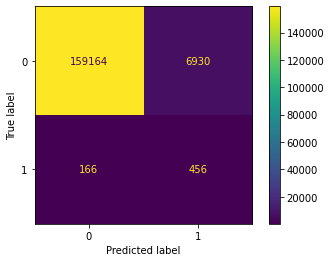

In [ ]:
plot_confusion_matrix(u_log_reg, X_test, y_test)
plt.show()

In [ ]:
print(classification_report(y_test,u_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    166094
           1       0.06      0.73      0.11       622

    accuracy                           0.96    166716
   macro avg       0.53      0.85      0.55    166716
weighted avg       1.00      0.96      0.97    166716



SMOTE:

In [ ]:
S_pred = S_log_reg.predict(X_test)

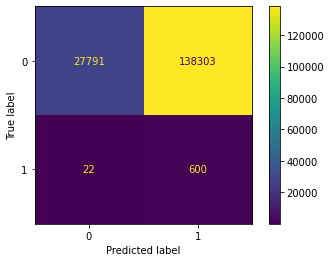

In [ ]:
plot_confusion_matrix(S_log_reg, X_test, y_test)
plt.show()

In [ ]:
print(classification_report(y_test,S_pred))

              precision    recall  f1-score   support

           0       1.00      0.17      0.29    166094
           1       0.00      0.96      0.01       622

    accuracy                           0.17    166716
   macro avg       0.50      0.57      0.15    166716
weighted avg       1.00      0.17      0.29    166716



# 5.) Which performed best in Out of Sample metrics?

From the classification report, undersampling performed best given the accuracy and the F1 score.

In [ ]:
print(f'Classification report for model trained on undersampled data: {classification_report(y_test,u_pred)}')

Classification report for model trained on undersampled data:               precision    recall  f1-score   support

           0       1.00      0.96      0.98    166094
           1       0.06      0.73      0.11       622

    accuracy                           0.96    166716
   macro avg       0.53      0.85      0.55    166716
weighted avg       1.00      0.96      0.97    166716



# 6.) Pick two features and plot the two classes before and after SMOTE.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_select.columns

Index(['trans_date_trans_time', 'category', 'amt', 'city_pop', 'is_fraud',
       'time_var'],
      dtype='object')

<Figure size 1440x720 with 0 Axes>

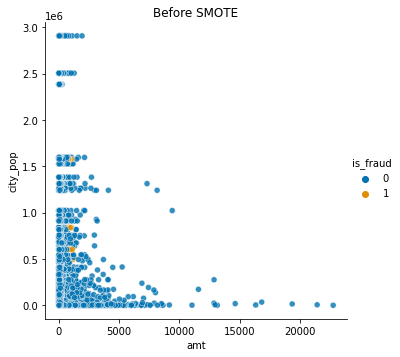

In [ ]:
plt.figure(figsize=(20,10))

sns.relplot(x="amt", y="city_pop", hue="is_fraud", alpha = .8, palette="colorblind",data=df_select)
plt.title('Before SMOTE')
plt.show()

In [ ]:
post_SMOTE = X_SMOTE.join(y_SMOTE)

<Figure size 1440x720 with 0 Axes>

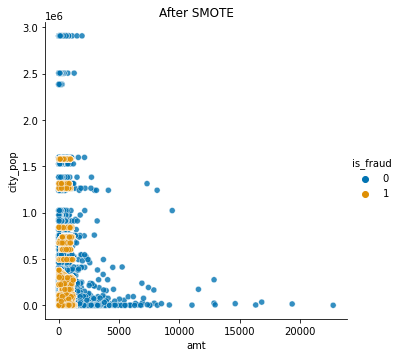

In [ ]:
plt.figure(figsize=(20,10))

sns.relplot(x="amt", y="city_pop", hue="is_fraud", alpha = .8, palette="colorblind",data=post_SMOTE)
plt.title('After SMOTE')
plt.show()